# Exploring Time Series

## Exploring and plotting before forecasting.

Before any forecasting is attempted it is important to understand a time series.

In this notebook you will learn how to:

* Plot a time series
* Adjust monthly time series to account for the different number of days in a month i.e., Feb Vs. July (as this can add additional noise to the data).
* Run a 'smoother' through the time series to assess/ identify trend.
* Break a time series into its trend and seasonal components using 'seasonal decomposition'

#### References
* [Matplotlib](https://matplotlib.org/stable/index.html)
* [Pandas Plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
* [Pandas Rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

## Imports

Seasonal decomposition is a method used in time series analysis to represent a time series as a sum (or, sometimes, a product) of three components - the linear trend, the periodic (seasonal) component, and random residuals [Reference Here](https://www.statistics.com/glossary/seasonal-decomposition/).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.style as style
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Import statsmodels and check version number
# 0.11.1 is not critical but recommended
import statsmodels as sm
sm.__version__

'0.14.3'

## The ED arrivals dataset.

The dataset we will use represent monthly adult (age > 18) arrivals to an Emergency Department.  The monthly frequency observations are between April 2009 and May 2017. 

See full list of offset aliases for frequencies [HERE](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) (i.e. 'MS')

View the dataset [HERE](https://raw.githubusercontent.com/hsma5/9a_introduction_to_forecasting/main/data/ed_mth_ts.csv)

In [4]:
url = 'https://raw.githubusercontent.com/hsma5/9a_introduction_to_forecasting/main/data/' \
        + 'ed_mth_ts.csv'
ed_month = pd.read_csv(url,
                       index_col='date',
                       parse_dates=True)
ed_month.index.freq = 'MS'

The first thing you should do when exploring a time series is check its length and duration.

In [5]:
# This tells us how many months are in the ts
ed_month.shape 

(98, 1)

In [5]:
# the minimum date
ed_month.index.min()

Timestamp('2009-04-01 00:00:00')

In [6]:
# the maximum date
ed_month.index.max()

Timestamp('2017-05-01 00:00:00', freq='MS')

### How to use Pandas and Matplotlib to visualise a time series

Pandas implements matplotlib functionality as part of its `DataFrame`. The quickest way to visualise a time series in Python is therefore to call the `plot()` method of a `DataFrame`.  

The `plot()` method takes a tuple parameter called `figsize`. The tuple represents the (length, height) of the image.

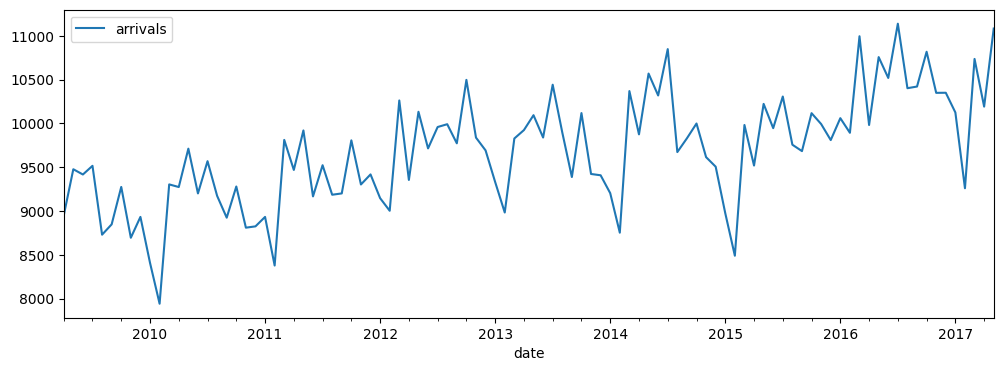

In [7]:
# the plot function returns an axis object we usually assign that to variable `ax`
# works for Pandas dataframe or series
# 12 width, 4 height
ax = ed_month.plot(figsize=(12,4))

You can then easily to save a high resolution image to file if you would like to use it in a report.

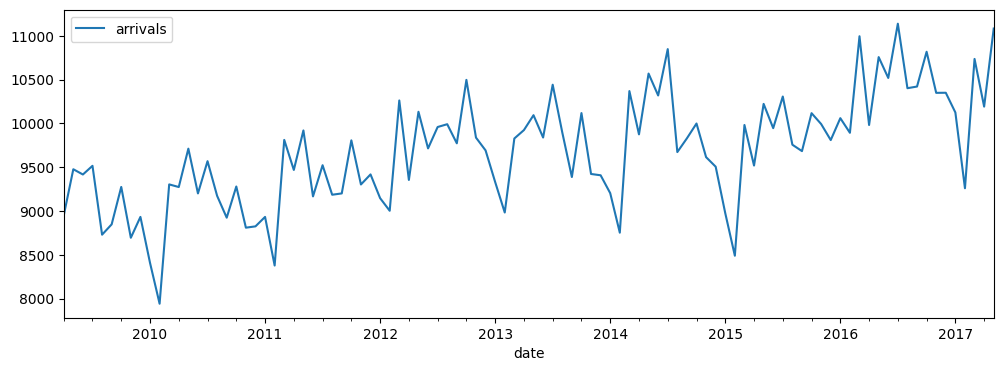

In [8]:
# Pandas makes it easy!
ax = ed_month.plot(figsize=(12,4))
ax.figure.savefig('images/explore.png')

### Improving the appearance of your time series plot

Matplotlib is very flexible. The full functionality is beyond the scope of this tutorial and it is recommended to review the [matplotlib site](https://matplotlib.org/stable/index.html) for examples.  Here we recommend the following parameters to help manipulate your plot.

* `color` e.g. 'green', 'blue' or 'orange'
* `linestyle` e.g. '--' for dashed, '-.' for dash-dot, or '' for none.
* `linewidth` - a number - typically 1, 1.5 or 2 will do.
* `marker` - e.g. 'o' for dots, '+' for crosses, '^' for triangle, and '' for none.

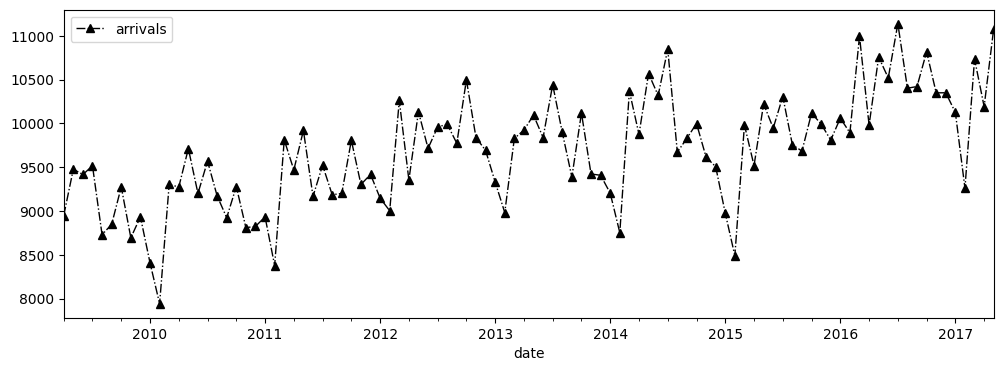

In [9]:
ax = ed_month.plot(figsize=(12,4),
                   color='black',
                   linestyle='-.',
                   marker='^',
                   linewidth=1)

The `plot` method returns an `axis` object. You can use this to manipulate the plot.  The following is often useful for time series plots.

* The y and x scale
* The y and x label.

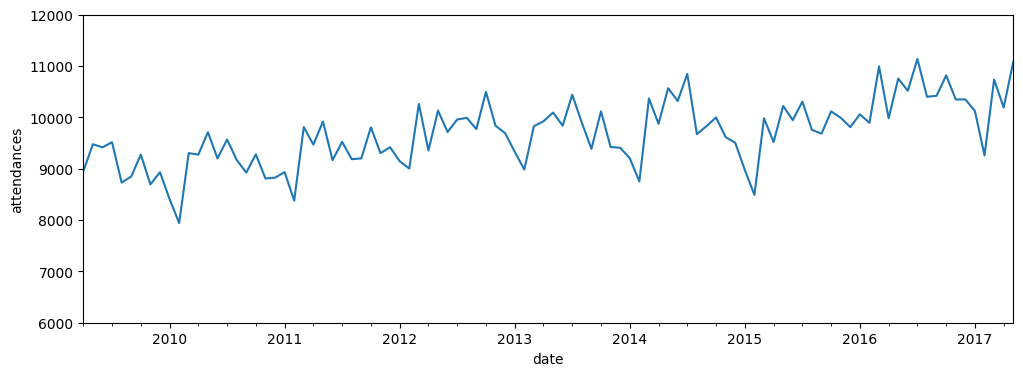

In [10]:
ax = ed_month.plot(figsize=(12,4),
                   legend=False);
ax.set_ylabel('attendances')

# set_ylim returns a tuple.  Its not useful so we normally assign it to '_'
# the underscore in 12000 represents a comma
_ = ax.set_ylim(6_000, 12_000) # underscore acts as a comma

Fugly plots! Try Tufte style plots instead: https://github.com/matplotlib/mpl-gallery/blob/master/gallery/style_sheets/tufte.py
Below is a plot form elswhere and then below that is the above data repotted using Turte style.

Text(1958, 320, 'Connecticut Traffic Deaths,\n1951 - 1959')

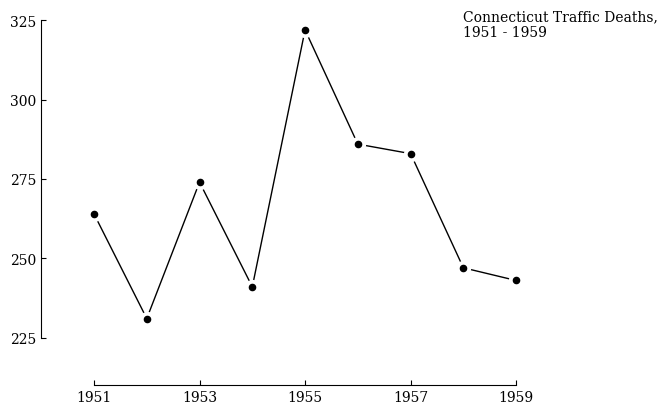

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Global options.
plt.rcParams['font.family'] = 'serif'

# Data from p74 of Visual Display of Quantitative Information.
x = list(range(1951, 1960))
y = [264, 231, 274, 241, 322, 286, 283, 247, 243]

# Plot line, line masks, then dots.
fig, ax = plt.subplots()
ax.plot(x, y, linestyle='-', color='black', linewidth=1, zorder=1)
ax.scatter(x, y, color='white', s=100, zorder=2)
ax.scatter(x, y, color='black', s=20, zorder=3)

# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set spine extent.
ax.spines['bottom'].set_bounds(min(x), max(x))
ax.spines['left'].set_bounds(225, 325)

# Reduce tick spacing.
x_ticks = list(range(min(x), max(x)+1, 2))
ax.xaxis.set_ticks(x_ticks)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=25))
ax.tick_params(direction='in')

# Adjust lower limits to let data breathe.
ax.set_xlim([1950, ax.get_xlim()[1]])
ax.set_ylim([210, ax.get_ylim()[1]])

# Axis labels as a title annotation.
ax.text(1958, 320, 'Connecticut Traffic Deaths,\n1951 - 1959')

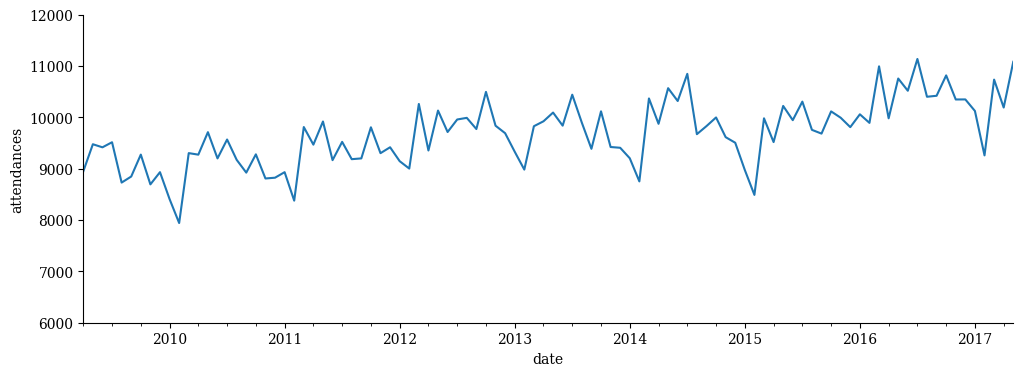

In [12]:
ax = ed_month.plot(figsize=(12,4),
                   legend=False);
ax.set_ylabel('attendances')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set spine extent.
# ax.spines['bottom'].set_bounds(min(x), max(x))
# ax.spines['left'].set_bounds(225, 325)
# set_ylim returns a tuple.  Its not useful so we normally assign it to '_'
# the underscore in 12000 represents a comma
_ = ax.set_ylim(6_000, 12_000) # underscore acts as a comma

#### Using Seaborn
You can also use the `seaborn` package to improve the default appearance of your charts.  

In [13]:
# Import the seaborn pacakge and set it...
import seaborn as sns
sns.set()

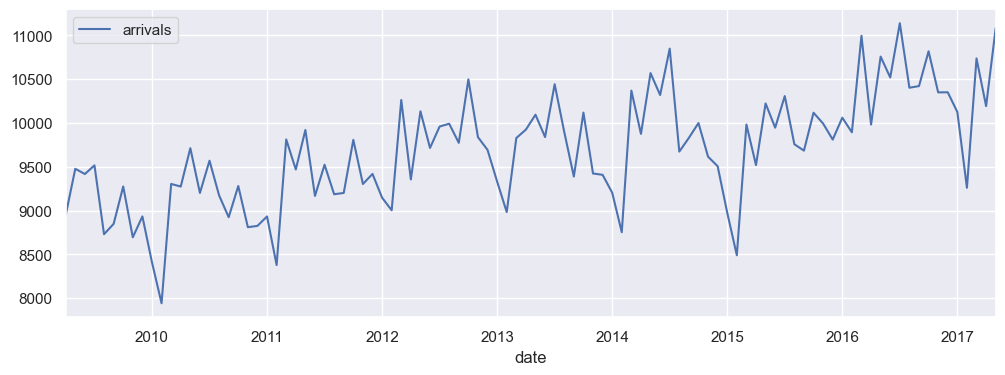

In [14]:
# lets take a look at how seaborn has now improved appearance
_ = ed_month.plot(figsize=(12,4))

### Visualising monthly data after adjusting for days in the month

When you are working with monthly data, some of the noise you are seeing the time series is due to months having a different number of days (i.e. February having 28 days).  This makes forecasting harder than it needs to be.  Adjusting the time series by dividing by the number of days per month removes that noise.  

This is very straightforward in pandas, using the built in property `DateTimeIndex.days_in_month`

In [15]:
ed_month.index.days_in_month

Int64Index([30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31,
            30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31,
            29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30,
            31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30,
            31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30,
            31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31],
           dtype='int64', name='date')

In [16]:
arrival_rate = ed_month['arrivals'] / ed_month.index.days_in_month

**Note that the units of the time series are now '*attendances / per day*'.**

In [17]:
arrival_rate.head()

date
2009-04-01    298.266667
2009-05-01    305.709677
2009-06-01    313.900000
2009-07-01    306.967742
2009-08-01    281.612903
Freq: MS, dtype: float64

In [18]:
ed_month.head()

,arrivals
date,
2009-04-01,8948
2009-05-01,9477
2009-06-01,9417
2009-07-01,9516
2009-08-01,8730


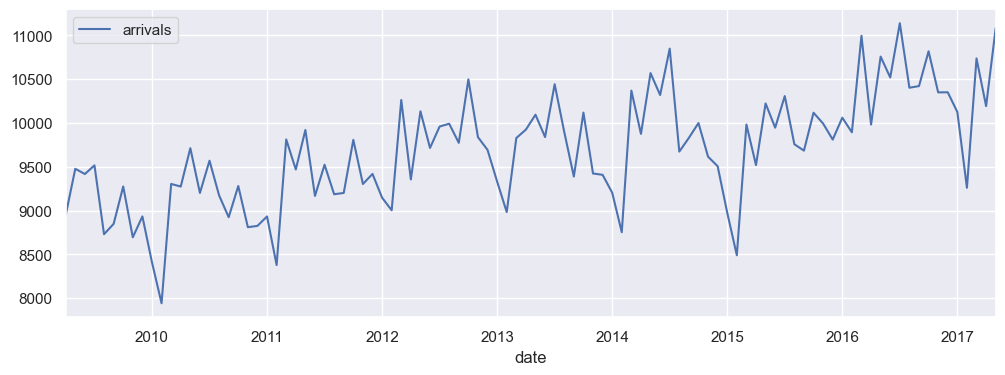

In [19]:
# Lets compare the original....
_ = ed_month.plot(figsize=(12,4));

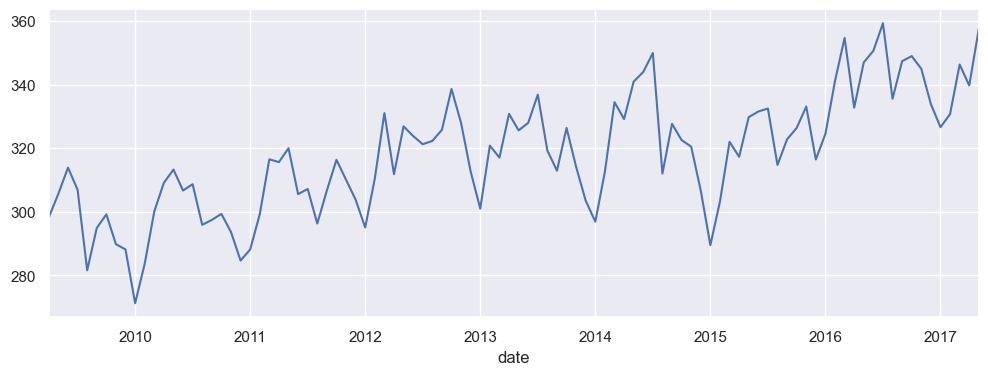

In [25]:
# with arrival rate...
# slightly smoother using arrival rate
# therefore making it easier for methods to forecast data
_ = arrival_rate.plot(figsize=(12,4));

## Run a 'smoother' through the time series.

Time series are subject to seasonal patterns and noise.  To help explore the trend in the data you can smooth the time series using a *moving average*.

Use the `rolling()` method of a pandas dataframe to create a moving average.

We will run a 12 month moving average through the data.

**What would happen if we looked at a 6 month rolling average?**

In [26]:
ma12 = arrival_rate.rolling(window=12).mean() #can also use median

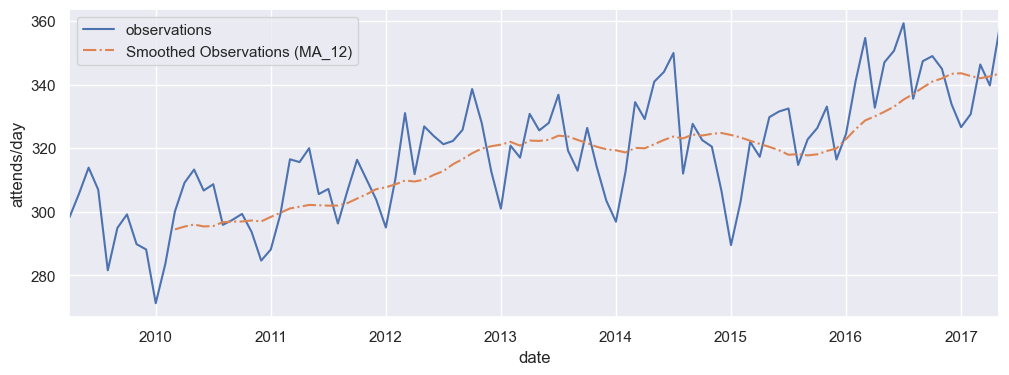

In [27]:
ax = arrival_rate.plot(figsize=(12,4),
                       label='observations')
ax = ma12.plot(ax=ax,
              linestyle='-.',
              label='Smoothed Observations (MA_12)') #MA = moving average
ax.legend()
_ = ax.set_ylabel('attends/day')

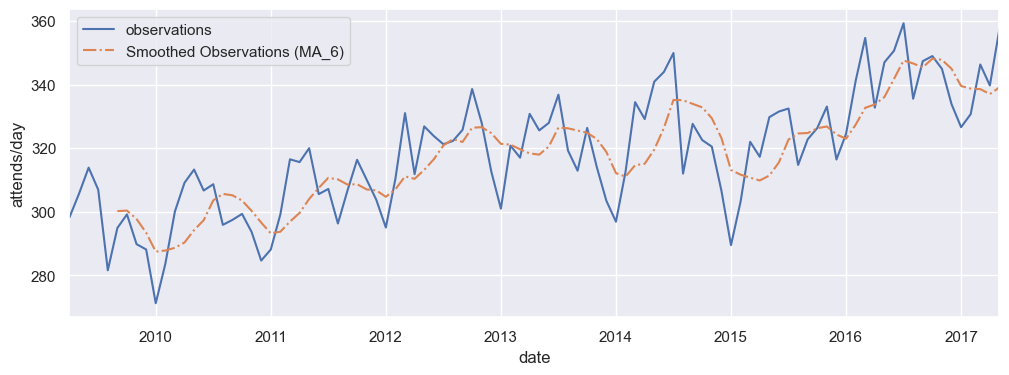

In [28]:
ma6 = arrival_rate.rolling(window=6).mean() #can also use median
ax = arrival_rate.plot(figsize=(12,4),
                       label='observations')
ax = ma6.plot(ax=ax,
              linestyle='-.',
              label='Smoothed Observations (MA_6)') #MA = moving average
ax.legend()
_ = ax.set_ylabel('attends/day')

As an alternative to smoothing, there is seasonal decomposition...

### Breaking a times series up into its trend and seasonal components (i.e. simple models).

To help visualise and understand trend and seasonality in a time series we can use seasonal decomposition.

This is a model based approach that breaks the time series into three components.  The basic approach to seasonal decomposition has two forms: additive and multiplicative.  

#### Additive decomposition

If we assume that an observation at time t $Y_t$ is the additive sum of trend $T_t$, seasonality $S_t$ and random error $E_t$.  then we have the following model.

$Y_t = T_t + S_t + E_t$

An additive model merely suggests that the components are added together. It is linear in nature and changes over time are consistently made by the same amount. *NB inear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).*

#### Multiplicative decomposition

If the seasonal fluctuations of the data grow over time then it is best to use a multiplicative model. Where an observation at time t $Y_t$ is the product (multiplication) of the trend $T_t$, seasonality $S_t$ and random error $E_t$

$Y_t = T_t \cdot  S_t \cdot  E_t$

A multiplicative model is nonlinear, such as quadratic or exponential. NB A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

![image](images/add_mult.png)
[Credit: Nikolaos Kourentzes](https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/)



Python has a built in seasonal decomposition method for you to use.  It can be imported from `statsmodels.tsa.seasonal.seasonal_decompose`

In [29]:
# its easy to use. Pass in the ts and specify the model
# How to decide on the model? Clear trend but spread appears consistent.
decomp = seasonal_decompose(arrival_rate, model='additive')

#### Plotting the components

The results of the seasonal decomposition include dataframes containing the trend and seasonality components.  As they are dataframe they can be plotted in the same manner as the raw data.

**Plotting Trend**

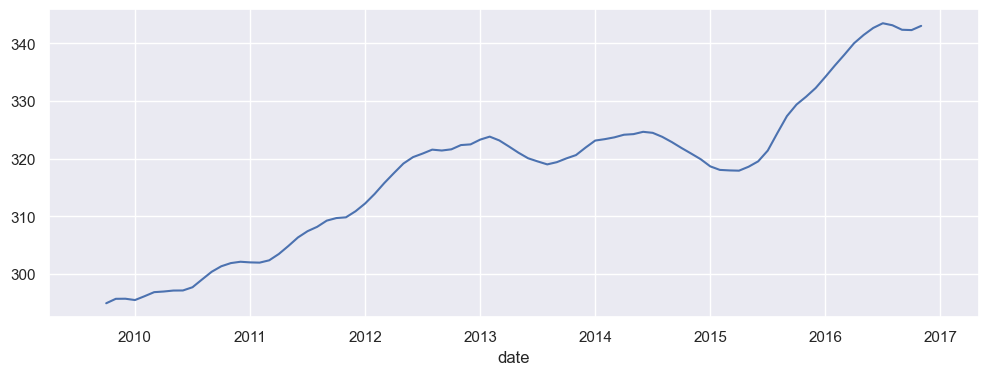

In [30]:
# Note that this is similar to smoothing....
# growth in 2010-2013 and 2015-2017; 2013-2015 = static
_ = decomp.trend.plot(figsize=(12,4))

**Plotting Seasonality**

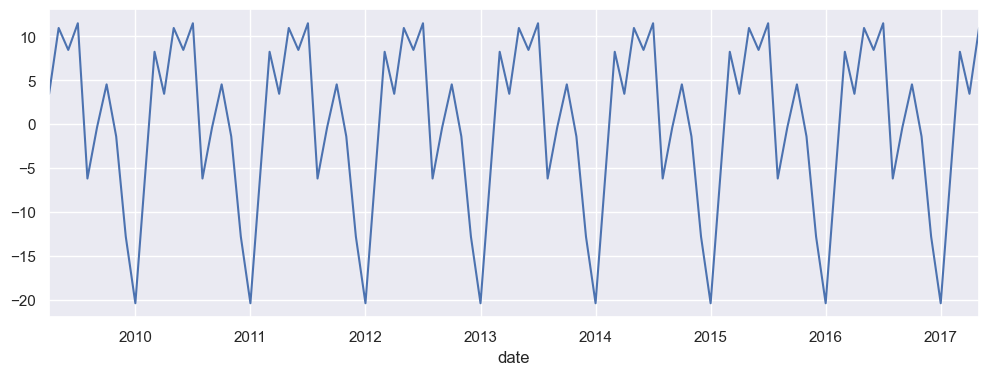

In [31]:
# See how months impact trend i.e. January values 20 less (-20)
_ = decomp.seasonal.plot(figsize=(12,4))

**Residuals (error)**

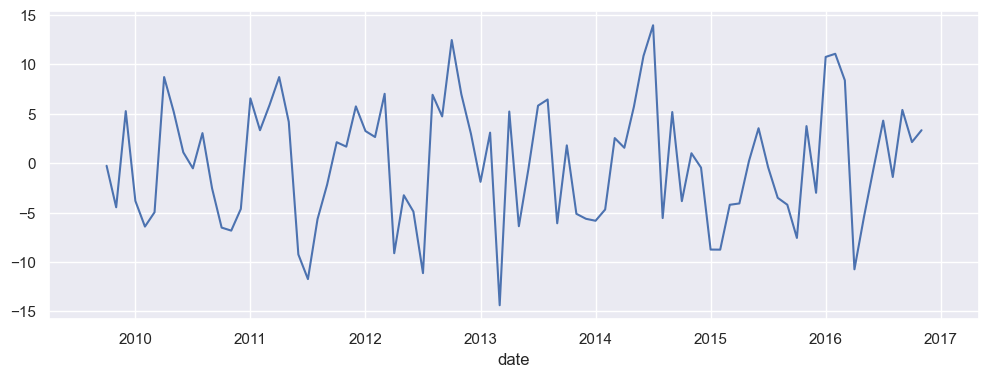

In [32]:
_ = decomp.resid.plot(figsize=(12,4))